<a href="https://colab.research.google.com/github/josegabrielguerrero26/CSE450-machinelearning/blob/main/Class_Study_Session_M02_%26_M03_(2_6_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 02 Review

1. Decision Tree Overview
2. Prune a Decision Tree
3. Ensemble methods


## 1. Decision Tree Overview

**Decision Tree Algos:** Splits the data based on values until only one label (prediction class) is reached. In its simplest form a decision tree can be viewed as a series of if-else statements.

**Entropy:** a measure of the randomness in the labels of a set of data. Generally entropy falls between 0 and 1. Zero means it has ZERO randomness. The closer we get to one the higher the randomness of the data. Very simple example using Spam or Ham emails:

* *Entropy value of 0:* Zero Entropy means your data only contains Spam categorized emails. Alternatively, if you had all Ham categories in your data it would also mean zero entropy. Its not random.

* *Entropy value between 0 and 1:* Data contains spam and ham categorized emails but is unbalanced. For example, 3 Ham and 7 Spam in a data set of 10 emails. Alternately, 7 Ham and 3 Spam is the same.

* *Entropy value of 1:* Means the data has a high level of randomness. Data would be perfectly balanced between categories. For example: 5 Ham and 5 Spam labeled emails out of a total of 10.

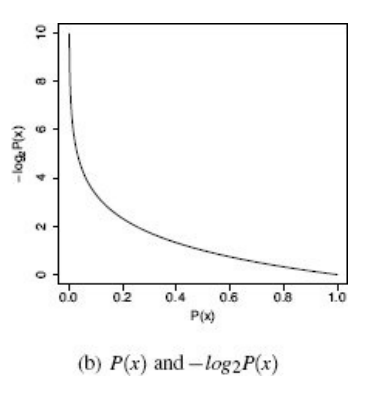

* X-Axis: Probability of an event x

* Y-Axis: Probability of an event x multiplied by negative log base 2.

* Relationship: High probabilities equal low entropy value; Low probabilities equals high entropy value.

**Information Gain (IG):** Also measured between 0-1 and helps the algo decide which column (feature) that is used to split. The column (feature) with the highest value of IG that is closest to one is chosen. Zero means no information and one means it has a high amount of information. The highest value closest to 1 is the column that has the most information for making a decision!

**Information Gain Calculation:**  IG = (Parent Node Total Entropy) - (Remaining Entropy or Weighted Sum of Child Nodes Entropy)

**The Higher Information Gain = The more Entropy removed**

**Column 1:** 1 - .5 = .5

**Column 2:** 1 - .2 = .8

**ID3 Algo:** Uses IG for making splits/decisions. Starts at the top or root node (the entire data set) and splits the data samples on the column (feature) with the highest information gain.  As new branches are created, each child node also splits the data on the column (feature) with the highest information gain. This is done until a value of 0 entropy is found in the remaining data.

## 2. Prune a Decision Tree

In [ ]:
# Import Data and dependencies
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
titanic = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Choosing specific features
features_target = ['Pclass', 'Sex', 'Age', 'Embarked','Survived']
titanic = titanic[features_target]
titanic.head()

,Pclass,Sex,Age,Embarked,Survived
0,3,male,22.0,S,No
1,1,female,38.0,C,Yes
2,3,female,26.0,S,Yes
3,1,female,35.0,S,Yes
4,3,male,35.0,S,No


In [ ]:
# Remove null values and check for null values
titanic = titanic.dropna()
titanic.isna().sum()

Pclass      0
Sex         0
Age         0
Embarked    0
Survived    0
dtype: int64

In [ ]:
# Create feature set and target set
y = titanic['Survived']
X = titanic.drop(columns = 'Survived')
X.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [ ]:
# Feature engineering - One-Hot Encoding, watch out for the "Dummy Variable Trap"
X = pd.get_dummies(X, drop_first= True)
X.head()

,Pclass,Age,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,1
1,1,38.0,0,0,0
2,3,26.0,0,0,1
3,1,35.0,0,0,1
4,3,35.0,1,0,1


In [ ]:
# Split X and y sets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# Build the decision tree model
treeclf = DecisionTreeClassifier()

# Train or Fit the decision tree model
treeclf.fit(X_train, y_train)

# Make predictions on the x_test set using the trained model
treetest_predictions = treeclf.predict(X_test)

In [ ]:
# Display confusion matrix
confusion_matrix(y_test,treetest_predictions)

array([[102,  24],
       [ 27,  61]])

In [ ]:
# Display classification report
print(classification_report(y_test,treetest_predictions))

              precision    recall  f1-score   support

          No       0.79      0.81      0.80       126
         Yes       0.72      0.69      0.71        88

    accuracy                           0.76       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.76      0.76       214



In [ ]:
# Build the decision tree model
prunedtreeclf = DecisionTreeClassifier(max_depth= 7)

# Train or Fit the decision tree model
prunedtreeclf.fit(X_train, y_train)

# Make predictions on the x_test set using the trained model
prunedtreetest_predictions = prunedtreeclf.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test,prunedtreetest_predictions))

              precision    recall  f1-score   support

          No       0.79      0.87      0.83       126
         Yes       0.78      0.66      0.72        88

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



## 3. Ensemble Methods

Ensemble methods improve results. Ensembles use multiple models that by themselves are weak learners but combined can predict very well. You are basically building multiple experts at classifying specific subsets of the data.

* *Bagging Method:* Combining multiple learners that learn independently and in parallel.

* *Boosting Method:* Combining multiple learners that learn sequentially and adapt to improve performance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier #bagging method
from sklearn.ensemble import AdaBoostClassifier #boosting method
from sklearn.ensemble import GradientBoostingClassifier #boosting method

In [ ]:
# Build the random forest decision tree model
baggingclf = RandomForestClassifier()

# Train or Fit the decision tree model
baggingclf.fit(X_train, y_train)

# Make predictions on the x_test set using the trained model
bagging_predictions = baggingclf.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test,bagging_predictions))

              precision    recall  f1-score   support

          No       0.80      0.82      0.81       126
         Yes       0.73      0.70      0.72        88

    accuracy                           0.77       214
   macro avg       0.76      0.76      0.76       214
weighted avg       0.77      0.77      0.77       214



In [ ]:
# Build the boosting decision tree model
boostingclf = AdaBoostClassifier()

# Train or Fit the decision tree model
boostingclf.fit(X_train, y_train)

# Make predictions on the x_test set using the trained model
boosting_predictions = boostingclf.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test,boosting_predictions))

              precision    recall  f1-score   support

          No       0.79      0.77      0.78       126
         Yes       0.68      0.70      0.69        88

    accuracy                           0.74       214
   macro avg       0.73      0.74      0.74       214
weighted avg       0.74      0.74      0.74       214



In [ ]:
# Build the gradient boosting decision tree model
gboostingclf = GradientBoostingClassifier()

# Train or Fit the decision tree model
gboostingclf.fit(X_train, y_train)

# Make predictions on the x_test set using the trained model
gboosting_predictions = gboostingclf.predict(X_test)

In [ ]:
# Classification Report
print(classification_report(y_test,gboosting_predictions))

              precision    recall  f1-score   support

          No       0.79      0.86      0.82       126
         Yes       0.77      0.68      0.72        88

    accuracy                           0.79       214
   macro avg       0.78      0.77      0.77       214
weighted avg       0.78      0.79      0.78       214



# Module 02 Bonus

## Data Dictionary for the Banking dataset

### General attributs:

>age: (numeric)

>job: type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

>marital: marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

>education: (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

>default: has credit in default? (categorical: "no","yes","unknown")

>housing: has housing loan? (categorical: "no","yes","unknown")

>loan: has personal loan? (categorical: "no","yes","unknown")



### Related to the last contact of the current campaign:

>contact: contact communication type (categorical: "cellular","telephone")

>month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

>dayofweek: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

### Other attributes:

>campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

>pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

>previous: number of contacts performed before this campaign and for this client (numeric)

>poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

### Social and Economic context attributes

>emp.var.rate: employment variation rate - quarterly indicator (numeric)

>cons.price.idx: consumer price index - monthly indicator (numeric)

>cons.conf.idx: consumer confidence index - monthly indicator (numeric)

>euribor3m: euribor 3 month rate - daily indicator (numeric)

>nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):

>y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
# Load test data and libararies
import seaborn as sns

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
# Get general information on bank data
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             37069 non-null  object 
 2   marital         37069 non-null  object 
 3   education       37069 non-null  object 
 4   default         37069 non-null  object 
 5   housing         37069 non-null  object 
 6   loan            37069 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  campaign        37069 non-null  int64  
 11  pdays           37069 non-null  int64  
 12  previous        37069 non-null  int64  
 13  poutcome        37069 non-null  object 
 14  emp.var.rate    37069 non-null  float64
 15  cons.price.idx  37069 non-null  float64
 16  cons.conf.idx   37069 non-null  float64
 17  euribor3m       37069 non-null 

In [ ]:
# Explore the data: number of contacts for current campaign
campaign.groupby('y')['campaign'].value_counts(normalize=True)

y    campaign
no   1           0.419616
     2           0.257631
     3           0.130063
     4           0.065488
     5           0.040260
     6           0.023980
     7           0.015885
     8           0.010590
     9           0.007547
     10          0.005965
     11          0.004686
     12          0.003317
     13          0.002374
     14          0.001643
     17          0.001400
     15          0.001369
     16          0.001339
     18          0.000913
     20          0.000883
     19          0.000791
     21          0.000639
     22          0.000517
     23          0.000396
     24          0.000396
     27          0.000304
     29          0.000304
     25          0.000213
     28          0.000213
     30          0.000213
     31          0.000213
     26          0.000183
     35          0.000152
     33          0.000122
     32          0.000091
     34          0.000061
     40          0.000061
     42          0.000061
     37          0.00003

In [ ]:
# Explore the data: number of contacts for current campaign
pd.concat([campaign.groupby('y')['campaign'].value_counts(normalize=True),
                campaign.groupby('y')['campaign'].value_counts()],
                axis=1,
                keys=('Percent','Count'))

Percent  Count
y   campaign                 
no  1         0.419616  13789
    2         0.257631   8466
    3         0.130063   4274
    4         0.065488   2152
    5         0.040260   1323
    6         0.023980    788
    7         0.015885    522
    8         0.010590    348
    9         0.007547    248
    10        0.005965    196
    11        0.004686    154
    12        0.003317    109
    13        0.002374     78
    14        0.001643     54
    17        0.001400     46
    15        0.001369     45
    16        0.001339     44
    18        0.000913     30
    20        0.000883     29
    19        0.000791     26
    21        0.000639     21
    22        0.000517     17
    23        0.000396     13
    24        0.000396     13
    27        0.000304     10
    29        0.000304     10
    25        0.000213      7
    28        0.000213      7
    30        0.000213      7
    31        0.000213      7
    26        0.000183      6
    35        0.000152      5
    33        0.000122      4
    32        0.000091      3
    34        0.000061      2
    40        0.000061      2
    42        0.000061      2
    37        0.000030      1
    39        0.000030      1
    41        0.000030      1
    56        0.000030      1
yes 1         0.495485   2085
    2         0.258555   1088
    3         0.125951    530
    4         0.053707    226
    5         0.025903    109
    6         0.015922     67
    7         0.008793     37
    9         0.004040     17
    8         0.003565     15
    10        0.002614     11
    11        0.002376     10
    17        0.000951      4
    12        0.000713      3
    13        0.000713      3
    15        0.000475      2
    14        0.000238      1

In [ ]:
# Explore the data: number of contacts for previous campaign
pd.concat([campaign.groupby('y')['previous'].value_counts(normalize=True),
                campaign.groupby('y')['previous'].value_counts()],
                axis=1,
                keys=('Percent','Count'))

Percent  Count
y   previous                 
no  0         0.886918  29145
    1         0.098597   3240
    2         0.010986    361
    3         0.002434     80
    4         0.000822     27
    5         0.000152      5
    6         0.000061      2
    7         0.000030      1
yes 0         0.675618   2843
    1         0.208175    876
    2         0.076759    323
    3         0.027567    116
    4         0.008793     37
    5         0.002376     10
    6         0.000713      3

In [ ]:
# Explore the data: outcome of previous call for previous campaign
pd.concat([campaign['poutcome'].value_counts(normalize=True),
                campaign['poutcome'].value_counts()],
                axis=1,
                keys=('Percent','Count'))

,Percent,Count
nonexistent,0.862931,31988
failure,0.103672,3843
success,0.033397,1238


In [ ]:
# Explore the data: groupby outcome of previous call and the number of contacts for previous campaign
pd.concat([campaign.groupby(['y','poutcome'])['previous'].value_counts(normalize=True),
                campaign.groupby(['y','poutcome'])['previous'].value_counts()],
                axis=1,
                keys=('Percent','Count'))

Percent  Count
y   poutcome    previous                 
no  failure     1         0.890948   2933
                2         0.087181    287
                3         0.015796     52
                4         0.005164     17
                5         0.000608      2
                6         0.000304      1
    nonexistent 0         1.000000  29145
    success     1         0.724057    307
                2         0.174528     74
                3         0.066038     28
                4         0.023585     10
                5         0.007075      3
                6         0.002358      1
                7         0.002358      1
yes failure     1         0.736842    406
                2         0.190563    105
                3         0.054446     30
                4         0.016334      9
                5         0.001815      1
    nonexistent 0         1.000000   2843
    success     1         0.577396    470
                2         0.267813    218
                3         0.105651     86
                4         0.034398     28
                5         0.011057      9
                6         0.003686      3

In [ ]:
# Explore the data: groupby outcome of previous call and the number of contacts for current campaign
pd.concat([campaign.groupby(['y','poutcome'])['campaign'].value_counts(normalize=True),
                campaign.groupby(['y','poutcome'])['campaign'].value_counts()],
                axis=1,
                keys=('Percent','Count'))

Percent  Count
y   poutcome campaign                 
no  failure  1         0.492710   1622
             2         0.284933    938
             3         0.098117    323
             4         0.051033    168
             5         0.027339     90
...                         ...    ...
yes success  3         0.110565     90
             4         0.029484     24
             6         0.011057      9
             5         0.008600      7
             7         0.002457      2

[96 rows x 2 columns]

In [ ]:
# Identify all "unknowns" in each column
unknown_count = campaign.eq('unknown').sum().to_frame('Count')
unknown_count

,Count
age,0
job,294
marital,69
education,1535
default,7725
housing,894
loan,894
contact,0
month,0
day_of_week,0


In [ ]:
# Add percentage of total to evaluation
unknown_count['Percentage'] = ((unknown_count['Count']/len(campaign))*100).round(2).astype(str) + '%'
unknown_count

,Count,Percentage
age,0,0.0%
job,294,0.79%
marital,69,0.19%
education,1535,4.14%
default,7725,20.84%
housing,894,2.41%
loan,894,2.41%
contact,0,0.0%
month,0,0.0%
day_of_week,0,0.0%


In [ ]:
# Compare Target column and Default column
pd.crosstab(campaign['default'],campaign['y'])

y,no,yes
default,,
no,25535,3806
unknown,7323,402
yes,3,0


In [ ]:
# Drop default column
campaign_clean = campaign.drop(columns='default')

In [ ]:
# Remove all rows with "unknown" in them.
campaign_clean = campaign_clean[campaign_clean.eq('unknown') == False].dropna()
campaign_clean.eq('unknown').sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
# Seperate Features from target
y = campaign_clean['y']
X = campaign_clean.drop(columns = 'y')
# X = campaign_clean[['nr.employed','age','euribor3m']]
X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
# Feature engineering - One-Hot Encoding, watch out for the "Dummy Variable Trap"
X = pd.get_dummies(X, drop_first=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34445 entries, 0 to 37068
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            34445 non-null  int64  
 1   campaign                       34445 non-null  int64  
 2   pdays                          34445 non-null  int64  
 3   previous                       34445 non-null  int64  
 4   emp.var.rate                   34445 non-null  float64
 5   cons.price.idx                 34445 non-null  float64
 6   cons.conf.idx                  34445 non-null  float64
 7   euribor3m                      34445 non-null  float64
 8   nr.employed                    34445 non-null  float64
 9   job_blue-collar                34445 non-null  uint8  
 10  job_entrepreneur               34445 non-null  uint8  
 11  job_housemaid                  34445 non-null  uint8  
 12  job_management                 34445 non-null 

In [ ]:
# Split X and y sets into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=45)

In [ ]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler()

# Fit the data to the resampler model
X_oversampler, y_oversampler = random_oversampler.fit_resample(X_train, y_train)

In [ ]:
# Build the decision tree model
treeclf = RandomForestClassifier(n_estimators=(700), max_depth=9)

# Train or Fit the decision tree model
treeclf.fit(X_oversampler, y_oversampler)

# Make predictions on the x_test set using the trained model
treetest_predictions = treeclf.predict(X_test)

In [ ]:
# Display confusion matrix
confusion_matrix(y_test,treetest_predictions)

array([[8023, 1185],
       [ 420,  706]])

In [ ]:
# Display classification report
print(classification_report(y_test,treetest_predictions))

              precision    recall  f1-score   support

          no       0.95      0.87      0.91      9208
         yes       0.37      0.63      0.47      1126

    accuracy                           0.84     10334
   macro avg       0.66      0.75      0.69     10334
weighted avg       0.89      0.84      0.86     10334



In [ ]:
# Identify the most important columns
# The zip function pairs each object
importance = treeclf.feature_importances_
df = pd.DataFrame(list(zip(importance, X.columns.to_list())),columns =['importance', 'feature'])
#print(importance,X.columns.to_list())

df = df.sort_values(by='importance')
df.head()

,importance,feature
24,0.000186,education_illiterate
31,0.000639,month_dec
18,0.001310,job_unemployed
11,0.001387,job_housemaid
10,0.001510,job_entrepreneur


<Axes: xlabel='importance', ylabel='feature'>

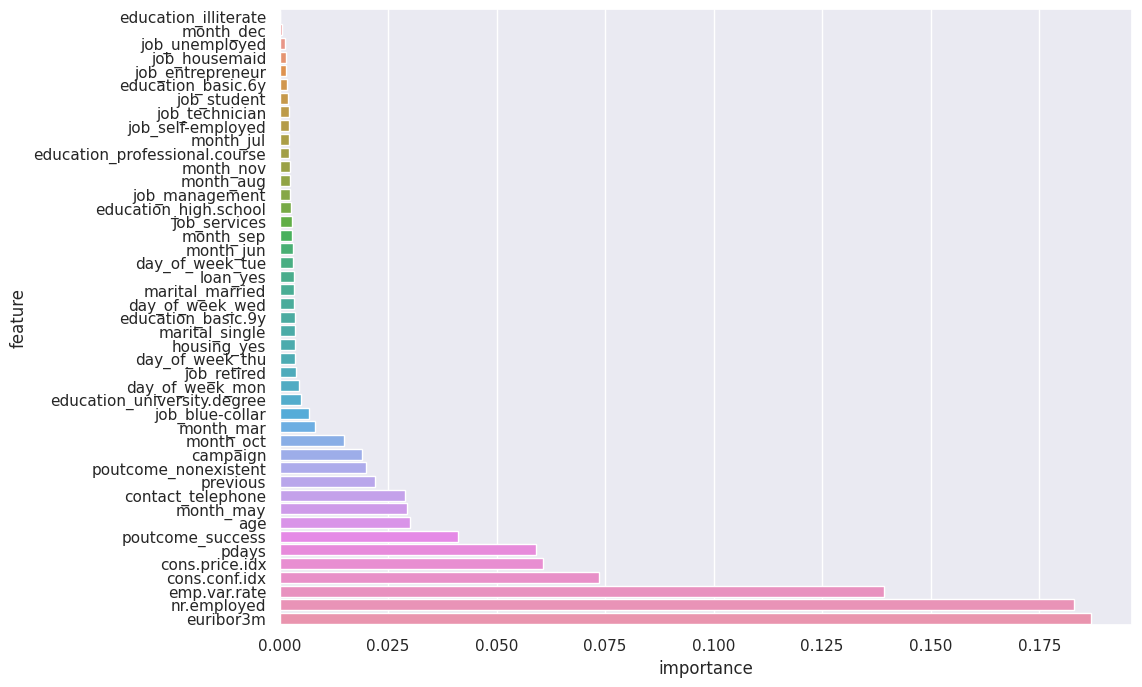

In [ ]:
# Visualize a bar graph of feature importance scores
sns.set(rc={'figure.figsize':(11,8)})
sns.barplot(data=df,x='importance',y='feature')
# number employed is being used as an indicator of how the economy is doing

In [ ]:
# Import holdout set
holdout = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank_holdout_test.csv")

In [ ]:
# Clean holdout set by droping default column and encode features
holdout = holdout.drop(columns='default')
# holdout = holdout[['nr.employed','age','euribor3m']]
holdout = pd.get_dummies(holdout, drop_first=True)
holdout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   campaign                       4119 non-null   int64  
 2   pdays                          4119 non-null   int64  
 3   previous                       4119 non-null   int64  
 4   emp.var.rate                   4119 non-null   float64
 5   cons.price.idx                 4119 non-null   float64
 6   cons.conf.idx                  4119 non-null   float64
 7   euribor3m                      4119 non-null   float64
 8   nr.employed                    4119 non-null   float64
 9   job_blue-collar                4119 non-null   uint8  
 10  job_entrepreneur               4119 non-null   uint8  
 11  job_housemaid                  4119 non-null   uint8  
 12  job_management                 4119 non-null   u

In [ ]:
# Remove encoded features for "unknown" values
holdout = holdout[holdout.columns.drop(list(holdout.filter(regex='unknown')))]

In [ ]:
# Make predictions on the holdout set using the trained model
holdout_predictions = treeclf.predict(holdout)

In [ ]:
# Change Yes and No values in predictions to 1 and 0
holdout_predictions = (holdout_predictions == 'yes').astype(int)
holdout_predictions

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
# Import holdout answers
answers = pd.read_csv("module2-holdout-answers.csv")

In [ ]:
# Compare holdout predictions to answers
confusion_matrix(holdout_predictions, answers)

array([[3223,  179],
       [ 464,  253]])

In [ ]:
# Compare holdout predictions to answers
print(classification_report(holdout_predictions, answers))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3402
           1       0.59      0.35      0.44       717

    accuracy                           0.84      4119
   macro avg       0.73      0.65      0.67      4119
weighted avg       0.82      0.84      0.83      4119



In [ ]:
# Save predictions to CSV
predictions = pd.DataFrame(holdout_predictions, columns =['predictions'])
predictions.to_csv('team6-module2-predictions.csv', index=False)

## Avoiding Plagerism in Code

It is totally okay if you want to use code or adapt code from a source.

Please sight the source just like you would do in a research paper. However, instead of quoting or paraphrasing a source, you include an inline comment in the code. In the code cell you should include the following:

1. Please reference the URL and the date of retrieval. Add more details if it will help the reader get a clearer understanding of the source.

2. If you adapted the code, you should indicate “Adapted from:” or “Based on” so it is understood that you modified the code.

Example in python:

In [ ]:
# The below code was adapted from:
# Emeka Efidi on 10/10/2022 https://medium.com/swlh/using-machine-learning-to-predict-subscription-to-bank-term-deposits-for-clients-with-python-aec8a4690807

# CODE

# Module 03 Introduction


In [ ]:
# Load some test data
# import pandas as pd
from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
mpg = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/mpg.csv')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
# Horsepower has some missing values, represented as '?'
mpg[mpg['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
# Get our target variable and features and split them into test and train datasets
y = mpg['mpg']
X = mpg[['cylinders', 'displacement', 'acceleration', 'weight']]
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the model and train it, use default hyperparameters for now
model = XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# Get predictions for our test data
predictions = model.predict(X_test)
predictions

array([18.545876 , 34.27729  , 31.269104 , 33.950447 , 29.447016 ,
       13.09027  , 31.826138 , 23.926426 , 24.968142 , 12.502587 ,
       14.358587 , 22.040045 , 34.75841  , 27.182917 , 23.832268 ,
       36.403126 , 23.64472  , 18.507267 , 23.810024 , 13.731463 ,
       32.920254 , 27.89495  , 23.831758 , 14.933758 , 18.672232 ,
       15.364875 , 25.91463  , 12.2477045, 29.522366 , 31.604452 ,
       26.18982  , 27.956738 , 16.521902 , 36.620773 , 25.575516 ,
       21.885931 , 28.759253 , 18.745268 , 34.95724  , 19.848095 ,
       11.789844 , 21.885931 , 24.117517 , 19.092756 , 23.472246 ,
       21.336697 , 35.83145  , 23.642914 , 31.415796 , 26.556305 ,
       31.054419 , 32.37435  , 30.770094 , 18.315565 , 26.01815  ,
       17.742569 , 19.01784  , 33.910915 , 31.411983 , 34.027218 ,
       19.5419   , 13.35514  , 16.896072 , 18.420063 , 19.352228 ,
       30.117006 , 33.855232 , 29.932108 , 26.13788  , 27.92065  ,
       15.366602 , 13.5838995, 24.622368 , 28.376741 , 16.1247

In [ ]:
# Compute the Root Mean Squared Error of the predictions
# Looks like we're off by just 4.6 mpg on average
# Not bad for a quick run with no real preprocessing
from sklearn.metrics import mean_squared_error
import math
mse_result = mean_squared_error(y_test, predictions)
rmse_result = math.sqrt(mse_result)
print(mse_result)
print(rmse_result)
# OR
rmse_result2 = mean_squared_error(y_test, predictions, squared= False)
print(rmse_result2)

21.201773222883652
4.604538328962378
4.604538328962378
